# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [ ]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
emissions=df["EMISSIONS"]

print(f"산술 평균: {emissions.mean():.2f}")
print(f"중앙값: {emissions.median():.2f}")
print(f"최빈값: {emissions.mode().values}")

# TODO 2: 절사평균 -
print(f'절사평균 (10%):{stats.trim_mean(emissions, 0.1):.2f}') # 상,하 10% 제거 후 평균
print(f'절사평균 (20%):{stats.trim_mean(emissions, 0.2):.2f}') # 상,하 10% 제거 후 평균

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
df_em2 = df.loc[(df["VEHICLE CLASS"] == "COMPACT") |
                (df["VEHICLE CLASS"] == "MID-SIZE")|
                (df["VEHICLE CLASS"] == "SUV") ]

em_mean= df_em2.groupby("VEHICLE CLASS")["EMISSIONS"].mean()
display(em_mean)

weights = np.array([50,30,20])
weighted_mean = np.average(em_mean, weights= weights)
print(f"가중 평균{weighted_mean:.2f}")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
em_sumarry= df_em2.groupby("VEHICLE CLASS")["EMISSIONS"].agg(
    means="mean",
    medians ="median"
).reset_index()
display(em_sumarry)

# TODO 5: 결과 해석 (print문으로 작성)
print("세 변수 모두 양의 왜도 형태를 띄고 있다.")


산술 평균: 250.07
중앙값: 243.00
최빈값: [221]
절사평균 (10%):247.34
절사평균 (20%):245.40


VEHICLE CLASS
COMPACT     211.539175
MID-SIZE    223.700676
SUV         270.303030
Name: EMISSIONS, dtype: float64

가중 평균226.94


,VEHICLE CLASS,means,medians
0,COMPACT,211.539175,207.0
1,MID-SIZE,223.700676,221.0
2,SUV,270.303030,267.0


세 변수 모두 양의 왜도 형태를 띄고 있다.


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

8.47
8.47
1.78
1.78
**********
2.91
2.91
1.34
1.34


,Q1,Q2,Q3,IQR,iqr_lower,iqr_upper
COMB (L/100 km),9.1,10.6,12.7,3.6,3.70,18.10
ENGINE SIZE,2.3,3.0,4.2,1.9,-0.55,7.05


COMB (L/100 km)    548
ENGINE SIZE         41
dtype: int64


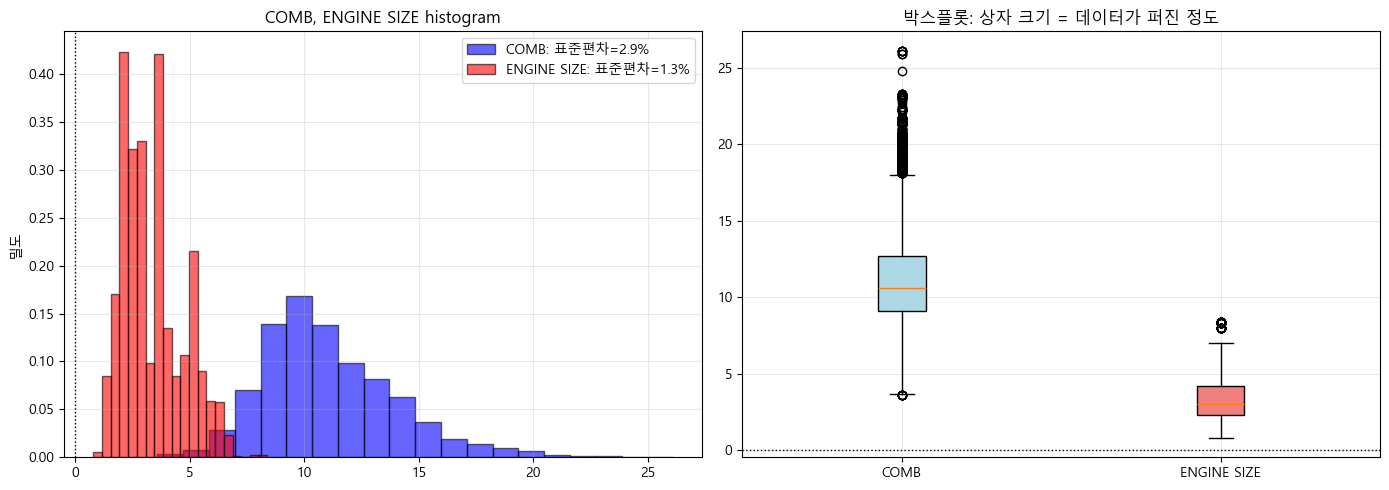

,VEHICLE CLASS,vars,stds,count
0,COMPACT,4.245206,2.060390,3127
1,MID-SIZE,5.736509,2.395101,2960
2,SUV,7.318339,2.705243,2640


,VEHICLE CLASS,vars,stds,count
0,COMPACT,1.163449,1.078633,3127
1,MID-SIZE,1.427971,1.194977,2960
2,SUV,1.436387,1.198494,2640


In [ ]:
df_var= df.loc[ : ,["COMB (L/100 km)","ENGINE SIZE"] ].copy()
df_var
# TODO 1: 두 변수의 산포 측도 계산
#  모분산 & 표본 분산
print(df_var["COMB (L/100 km)"].var(ddof=0).round(2))
print(df_var["COMB (L/100 km)"].var(ddof=1).round(2))
print(df_var["ENGINE SIZE"].var(ddof=0).round(2))
print(df_var["ENGINE SIZE"].var(ddof=1).round(2))

#  모 표준 편차 & 표본 표준 편차
# TODO 2: 변동계수(CV) 계산 

print("*" * 10)
print(df_var["COMB (L/100 km)"].std(ddof=0).round(2))
print(df_var["COMB (L/100 km)"].std(ddof=1).round(2))
print(df_var["ENGINE SIZE"].std(ddof=0).round(2))
print(df_var["ENGINE SIZE"].std(ddof=1).round(2))

# TODO 3: 이상치 탐지 (IQR, Z-score)
# 백분위수 
quan= [0.25,0.5,0.75]
idx= ["Q1","Q2","Q3"]
df_quan = (
    df[["COMB (L/100 km)", "ENGINE SIZE"]]
    .quantile(quan)
    .set_index(pd.Index(idx))
    .T
)

# IQR 
df_quan["IQR"] = df_quan["Q3"] - df_quan["Q1"]
df_quan["iqr_lower"] = df_quan["Q1"] - (1.5 * df_quan["IQR"]) 
df_quan["iqr_upper"] = df_quan["Q3"] + (1.5 * df_quan["IQR"]) 

display(df_quan)

# 이상치 탐지 
iqr_outliers = df_var[(df_var < df_quan["iqr_lower"]) 
                      | (df_var > df_quan["iqr_upper"])]
coun_out = iqr_outliers.count()
print(coun_out)

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# 히스토그램
axes[0].hist(df_var["COMB (L/100 km)"], bins=20, alpha=0.6, color='blue', edgecolor='black',
             label=f'COMB: 표준편차={df_var["COMB (L/100 km)"].std():.1f}%', density=True)
axes[0].hist(df_var["ENGINE SIZE"], bins=20, alpha=0.6, color='red', edgecolor='black',
             label=f'ENGINE SIZE: 표준편차={df_var["ENGINE SIZE"].std():.1f}%', density=True)
axes[0].axvline(0, color='black', linestyle=':', linewidth=1,)
axes[0].set_ylabel('밀도')
axes[0].set_title('COMB, ENGINE SIZE histogram')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 박스플롯
bp = axes[1].boxplot([df_var["COMB (L/100 km)"], df_var["ENGINE SIZE"]],
                     labels=['COMB', 'ENGINE SIZE'],
                     patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[1].axhline(0, color='black', linestyle=':', linewidth=1)
axes[1].set_title('박스플롯: 상자 크기 = 데이터가 퍼진 정도')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교

em_sumarry2= df_em2.groupby("VEHICLE CLASS")["COMB (L/100 km)"].agg(
    vars = "var", 
    stds="std",
    count ="count"
).reset_index()
display(em_sumarry2) 

em_sumarry3= df_em2.groupby("VEHICLE CLASS")["ENGINE SIZE"].agg(
    vars = "var", 
    stds="std",
     count ="count"
).reset_index()
display(em_sumarry3) 


# TODO 6: 결과 해석
print("ENGINE SIZE 변수는 큰 양의 왜도 형태를 띄며 첨도가 낮은 분포다. ")
print("COMB (L/100 km)은 약간의 양의 왜도 형태지만 첨도가 높아 이상값이 많이 검출된다. ")
print("COMB (L/100 km)은 분산과 IQR이 ENGINE SIZE보다 더 크다 ")



---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

,skew,kurt
ENGINE SIZE,0.631264,-0.394947
COMB (L/100 km),0.817065,1.054642
COMB (mpg),1.172800,3.643618
EMISSIONS,0.534641,0.615430


,FUEL,skew,kurt
0,D,-0.367713,-1.042831
1,E,-0.189320,-0.256257
2,N,-1.851785,3.071255
3,X,0.330538,-0.292857
4,Z,0.997177,1.607523


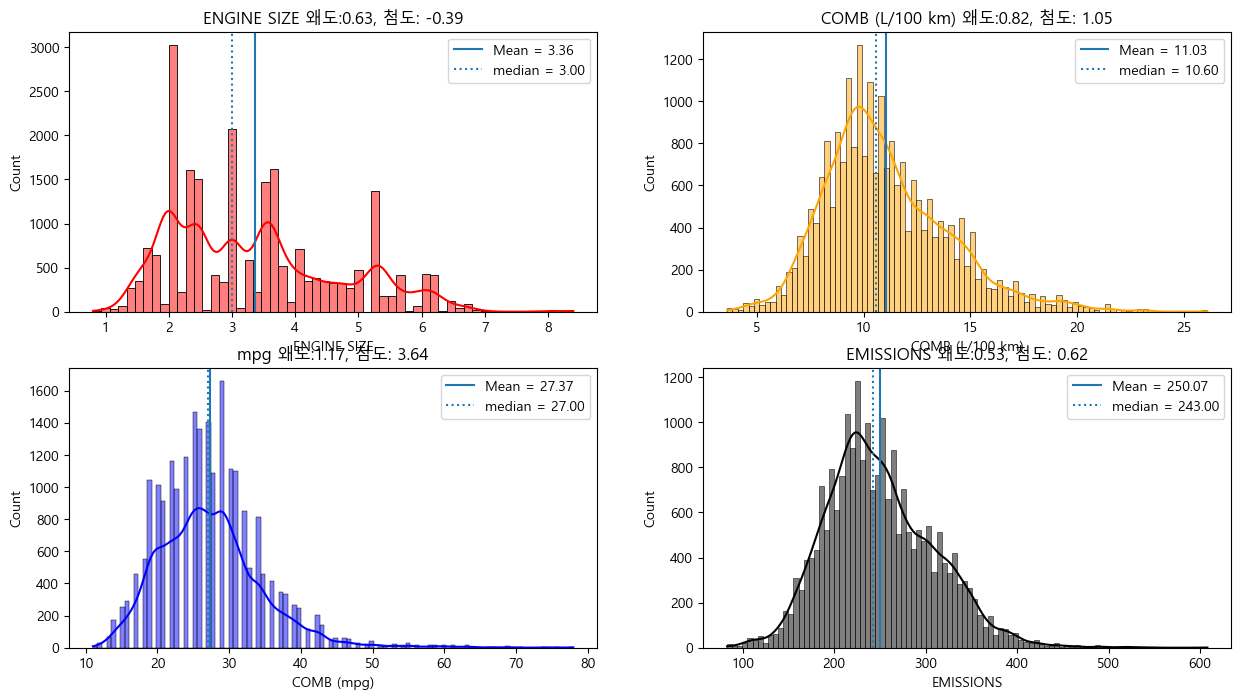

In [ ]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
skew_kurt= pd.DataFrame({
    "skew": df[numeric_cols].skew(),
    "kurt": df[numeric_cols].kurt()
})
display(skew_kurt)

ENGINE_skew = skew_kurt.loc["ENGINE SIZE","skew"].round(2)
ENGINE_kurt = skew_kurt.loc["ENGINE SIZE","kurt"].round(2)

km_skew = skew_kurt.loc["COMB (L/100 km)","skew"].round(2)
km_kurt = skew_kurt.loc["COMB (L/100 km)","kurt"].round(2)

mpg_skew = skew_kurt.loc["COMB (mpg)","skew"].round(2)
mpg_kurt = skew_kurt.loc["COMB (mpg)","kurt"].round(2)

EMISSIONS_skew = skew_kurt.loc["EMISSIONS","skew"].round(2)
EMISSIONS_kurt = skew_kurt.loc["EMISSIONS","kurt"].round(2)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig, axes = plt.subplots(2,2,figsize=(15,8))
sns.histplot(df["ENGINE SIZE"],bins='auto', ax= axes[0,0], kde= True, color="red")
axes[0,0].set_title(f"ENGINE SIZE 왜도:{ENGINE_skew}, 첨도: {ENGINE_kurt}")
axes[0,0].axvline(df["ENGINE SIZE"].mean(), linestyle="-", label=f"Mean = {df['ENGINE SIZE'].mean():.2f}")
axes[0,0].axvline(df["ENGINE SIZE"].median(), linestyle=":", label=f"median = {df['ENGINE SIZE'].median():.2f}")
axes[0,0].legend()

sns.histplot(df["COMB (L/100 km)"],bins='auto', ax= axes[0,1], kde= True, color="orange")
axes[0,1].set_title(f"COMB (L/100 km) 왜도:{km_skew}, 첨도: {km_kurt}")
axes[0,1].axvline(df["COMB (L/100 km)"].mean(), linestyle="-", label=f"Mean = {df['COMB (L/100 km)'].mean():.2f}")
axes[0,1].axvline(df["COMB (L/100 km)"].median(), linestyle=":", label=f"median = {df['COMB (L/100 km)'].median():.2f}")
axes[0,1].legend()

sns.histplot(df["COMB (mpg)"],bins='auto', ax= axes[1,0], kde= True, color="blue")
axes[1,0].set_title(f"mpg 왜도:{mpg_skew}, 첨도: {mpg_kurt}")
axes[1,0].axvline(df["COMB (mpg)"].mean(), linestyle="-", label=f"Mean = {df['COMB (mpg)'].mean():.2f}")
axes[1,0].axvline(df["COMB (mpg)"].median(), linestyle=":", label=f"median = {df['COMB (mpg)'].median():.2f}")
axes[1,0].legend()

sns.histplot(df["EMISSIONS"],bins='auto', ax= axes[1,1], kde= True, color="black")
axes[1,1].set_title(f"EMISSIONS 왜도:{EMISSIONS_skew}, 첨도: {EMISSIONS_kurt}")
axes[1,1].axvline(df["EMISSIONS"].mean(), linestyle="-", label=f"Mean = {df['EMISSIONS'].mean():.2f}")
axes[1,1].axvline(df["EMISSIONS"].median(), linestyle=":", label=f"median = {df['EMISSIONS'].median():.2f}")
axes[1,1].legend()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

fuel_em= df.groupby("FUEL")["EMISSIONS"].agg(
    skew= "skew",
    kurt= "kurt"
).reset_index()
display(fuel_em)


# TODO 5: 결과 해석


---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [ ]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    pass


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    pass


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [ ]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")